In [1]:
import pandas as pd
import numpy as np
import os 
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
df_param = pd.read_csv('metricas_randomForest.csv')
df_param

,year,num_arvores,max_features,Acurácia
0,1985,25,5,0.910134
1,1985,25,10,0.912690
2,1985,25,15,0.913997
3,1985,25,17,0.913716
4,1985,25,20,0.914292
...,...,...,...,...
243,1989,50,25,0.919615
244,1989,50,30,0.919706
245,1989,70,5,0.917105
246,1989,70,10,0.919149


In [27]:
year = 1986
df_param_year = df_param[df_param['year'] == year]

In [ ]:

fig = px.scatter_3d(
                df_param[df_param['year'] == year], 
                x= 'num_arvores', 
                y= 'max_features', 
                z= 'Acurácia',
#                 color='petal_length'
                )

fig.show()

In [ ]:
# Transform it to a long format
df= df_param_year.unstack().reset_index()
# df.columns=["X","Y","Z"]


In [ ]:
#  x= 'num_arvores', 
#                 y= 'max_features', 
#                 z= 'Acurácia',

In [ ]:
# And transform the old column name in something numeric
# df['num_arvores']=pd.Categorical(df['num_arvores'])
# df['num_arvores']=df['num_arvores'].cat.codes
 

In [ ]:
# to Add a color bar which maps values to colors.
fig = plt.figure(figsize=(16,10))
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(
                df_param_year['max_features'], 
                df_param_year['num_arvores'], 
                df_param_year['Acurácia'], 
                cmap=plt.cm.YlOrRd, 
                linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()

<ipython-input-30-ccc343e668f2>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


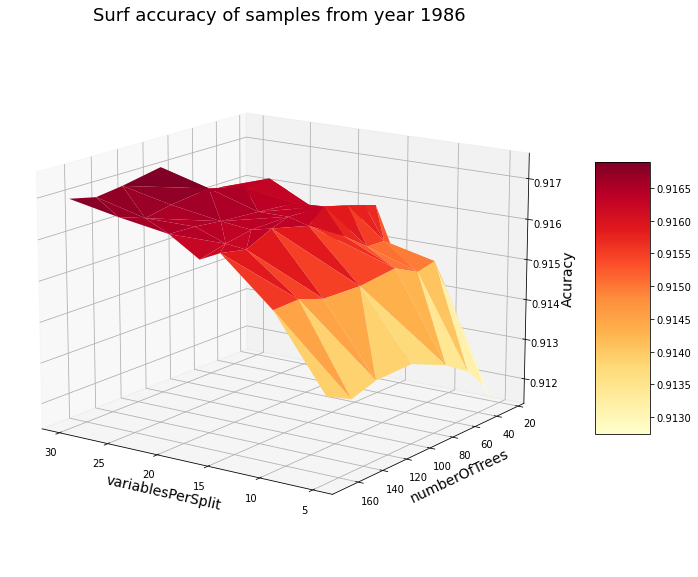

In [30]:
fig = plt.figure(figsize=(16,10))
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(
                df_param_year['max_features'], 
                df_param_year['num_arvores'], 
                df_param_year['Acurácia'], 
                cmap=plt.cm.YlOrRd, 
                linewidth=0.2)
ax.view_init(15, 125)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.title("Surf accuracy of samples from year " + str(year), fontsize= 18)
ax.set_zlabel("Acuracy", fontsize= 14, linespacing= 8.8)
ax.set_xlabel("variablesPerSplit", fontsize= 14, linespacing= 8.8)
ax.set_ylabel("numberOfTrees", fontsize= 14, linespacing = 8.8)
ax.set_zlim(0.9115,0.9175)
plt.show()


In [31]:
# image resolution
dpi=96
directory = 'graphic_acc_' + str(year)
path_dir = os.getcwd()
path = os.path.join(path_dir, directory)
# os.mkdir(path)
# For each year:
ii = 15
for jj in range(0, 360, 25):
#         # Turn interactive plotting off
    plt.ioff()

    # initialize a figure
#         fig = plt.figure(figsize=(680/dpi, 480/dpi), dpi=dpi)

    fig = plt.figure(figsize=(16,10), dpi=dpi)
    fig.patch.set_facecolor('white')
    fig.patch.set_alpha(1)
    ax = fig.gca(projection='3d')
    surf=ax.plot_trisurf(
                    df_param_year['max_features'], 
                    df_param_year['num_arvores'], 
                    df_param_year['Acurácia'], 
                    cmap=plt.cm.YlOrRd, 
                    linewidth=0.2)
    ax.view_init(ii, jj)
    fig.colorbar( surf, shrink=0.5, aspect=5)
    plt.title("Surf accuracy of samples from year " + str(year), fontsize= 18)
    ax.set_zlabel("Acuracy", fontsize= 14, linespacing= 8.8)
    ax.set_xlabel("variablesPerSplit", fontsize= 14, linespacing= 8.8)
    ax.set_ylabel("numberOfTrees", fontsize= 14, linespacing = 8.8)
    ax.set_zlim(0.9115,0.9175)

    # Save it & close the figure
    # Save it & close the figure
    filename= path + '/acc_step'+str(ii) + "_" + str(jj)+'.png'
    plt.savefig(fname=filename, dpi=96,  
                bbox_inches="tight", 
                pad_inches=0.3,
                transparent= False)
#     plt.gca()
    plt.close(fig)


<ipython-input-31-b8ba8f22cfb0>:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [ ]:
# Bash
# convert -delay 80 Gapminder*.png animated_gapminder.gif

In [ ]:
Image(filename='graphic_acc/animated_acc_1985.gif') 

In [14]:
# image resolution
dpi=96
for year in range(1986, 1990):
    df_param_year = df_param[df_param['year'] == year]
    directory = 'graphic_acc_' + str(year)
    path_dir = os.getcwd()
    path = os.path.join(path_dir, directory)
    os.mkdir(path)
    # For each year:
    ii = 15
    for jj in range(0, 360, 25):
    #         # Turn interactive plotting off
        plt.ioff()

        # initialize a figure
    #         fig = plt.figure(figsize=(680/dpi, 480/dpi), dpi=dpi)

        fig = plt.figure(figsize=(16,10), dpi=dpi)
        fig.patch.set_facecolor('white')
        fig.patch.set_alpha(1)
        ax = fig.gca(projection='3d')
        surf=ax.plot_trisurf(
                        df_param_year['max_features'], 
                        df_param_year['num_arvores'], 
                        df_param_year['Acurácia'], 
                        cmap=plt.cm.YlOrRd, 
                        linewidth=0.2)
        ax.view_init(ii, jj)
        fig.colorbar( surf, shrink=0.5, aspect=5)
        plt.title("Surf accuracy of samples from year " + str(year), fontsize= 18)
        ax.set_zlabel("Acuracy", fontsize= 14, linespacing= 8.8)
        ax.set_xlabel("variablesPerSplit", fontsize= 14, linespacing= 8.8)
        ax.set_ylabel("numberOfTrees", fontsize= 14, linespacing = 8.8)
        ax.set_zlim(0.91,0.916)

        # Save it & close the figure
        # Save it & close the figure
        filename= path + '/acc_step_'+ str(ii) + "_" + str(jj)+'.png'
        plt.savefig(fname=filename, dpi=96,  
                    bbox_inches="tight", 
                    pad_inches=0.3,
                    transparent= False)
    #     plt.gca()
        plt.close(fig)


FileExistsError: [Errno 17] File exists: '/home/superusuario/Dados/Mapbiomas/col6_0/graphic_acc_1986'

In [ ]:
import subprocess

In [ ]:
for year in range(1986, 1990):    
    directory = 'graphic_acc_' + str(year)
    path_dir = os.getcwd()
    path = os.path.join(path_dir, directory)

    comand = "convert -delay 80 " + directory + "/acc_step_*.png " + directory +"/acc_animate_" + str(year) + ".gif"
    print(comand)
    subprocess.run(comand)

In [ ]:
"convert -delay 80 acc_step_*.png acc_animate_1989.gif"